1. leggere con attenzione la descrizione del dataset
2. creare un nuovo notebook Python per:
   1. eliminare dal dataset le colonne o i dati inutili se presenti
   2. modificare, se necessario, i dati presenti per poter utilizzare senza problemi i metodi oggetto della verifica
   3. provare a utilizzare l'algoritmo K-NN con diversi valori di K per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando qual è il valore di K migliore e perché.
   4. scrivere il codice necessario per trovare il miglior valore di K. Provare poi il metodo con quel valore.  
   5. provare a utilizzare l'algoritmo decision tree con diversi valori dei parametri del metodo per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando quali sono i valori dei parametri che meglio descrivono il fenomeno e perché. Visualizzare anche l'albero generato dal metodo
   6. fare un confronto tra i due metodi e dire quale è il migliore. Visualizzare le due confusion matrix e il classification report in modo che sia semplice per il lettore capire le motivazioni

In [287]:
import pandas as pd

In [288]:
df = pd.read_csv('./Data/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [289]:
buying = ['low', 'med', 'high', 'vhigh']
doors = ['2', '3', '4', '5more']
persons = ['2', '4', 'more']
lug_boot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']

def clean(index, values):
    df.at[index, 'buying'] = buying.index(values[0])
    df.at[index, 'maint'] = buying.index(values[1])
    df.at[index, 'doors'] = doors.index(values[2])
    df.at[index, 'persons'] = persons.index(values[3])
    df.at[index, 'lug_boot'] = lug_boot.index(values[4])
    df.at[index, 'safety'] = safety.index(values[5])
    df.at[index, 'class'] = ['unacc', 'acc', 'good', 'vgood'].index(values[6])

In [290]:
for index, row in df.iterrows():
    clean(index, row.values)

In [291]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


In [292]:
x=df.to_numpy()[:,0:-1]
y=df.to_numpy()[:,-1].astype('int')

import collections
collections.Counter(y)

Counter({0: 1210, 1: 384, 3: 65, 2: 69})

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y, random_state = 123)

### KNN

In [294]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

predict = neigh.predict(X_test)

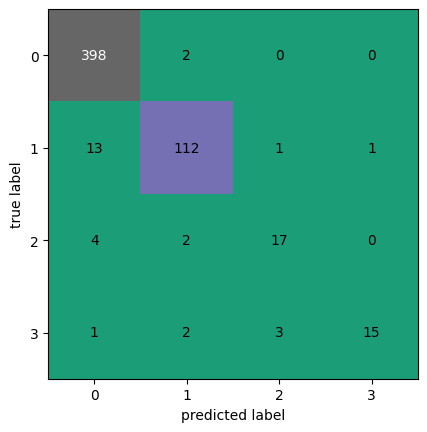

In [295]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [296]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       400
           1       0.95      0.88      0.91       127
           2       0.81      0.74      0.77        23
           3       0.94      0.71      0.81        21

    accuracy                           0.95       571
   macro avg       0.91      0.83      0.87       571
weighted avg       0.95      0.95      0.95       571



In [297]:
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

from sklearn.metrics import f1_score, accuracy_score

f1s = []
accs = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    predict = neigh.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

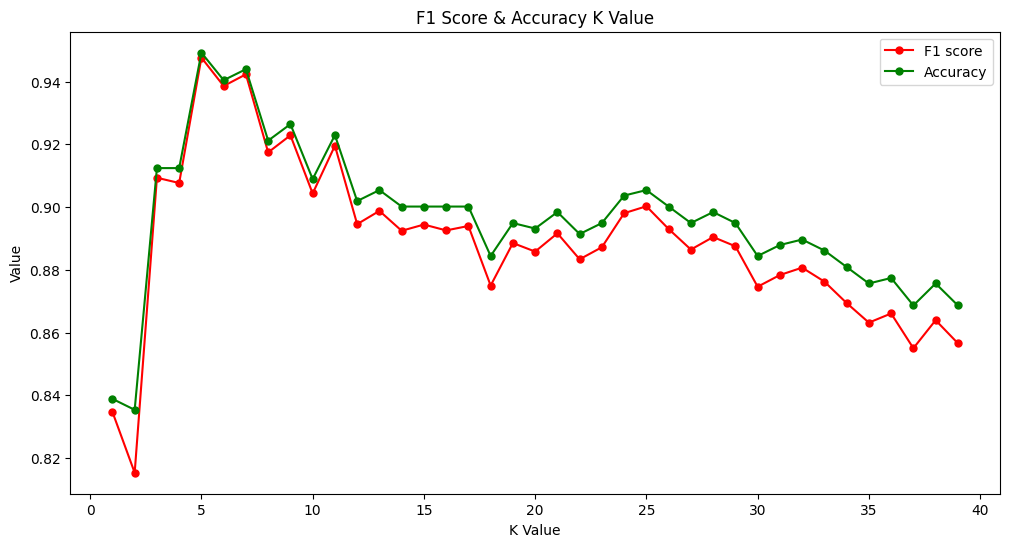

In [298]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 40), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Value')

### Decision Tree

In [299]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=30, max_leaf_nodes=6, min_samples_leaf=4)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)

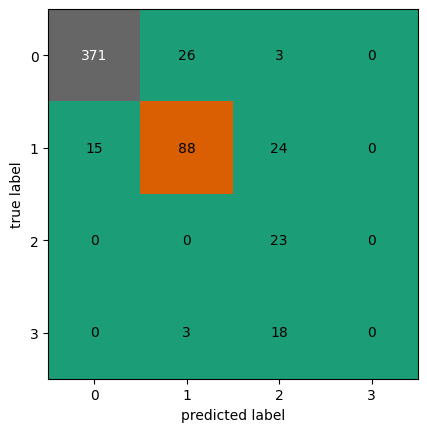

In [300]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [301]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       400
           1       0.75      0.69      0.72       127
           2       0.34      1.00      0.51        23
           3       0.00      0.00      0.00        21

    accuracy                           0.84       571
   macro avg       0.51      0.66      0.54       571
weighted avg       0.85      0.84      0.84       571



d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


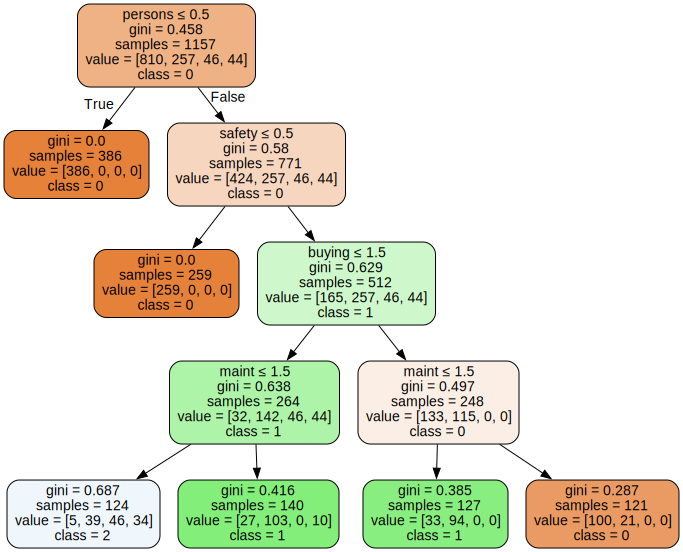

In [302]:
features=list(df)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1','2','3'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph